# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

Đọc dữ liệu

In [3]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4.0,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4.0,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4.0,False
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4.0,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4.0,False


In [4]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_9b4949859,0.0,0,10,0,1,1,0,0.0,3,...,441,169,0,36,7.367346,0.734694,86.224487,441,NaN,False
1,ID_26f1e5c61,0.0,0,10,0,1,1,0,0.0,3,...,81,169,0,36,7.367346,0.734694,86.224487,81,NaN,False
2,ID_c7c4a16e2,0.0,0,10,0,1,1,0,0.0,3,...,4,169,0,36,7.367346,0.734694,86.224487,4,NaN,False
3,ID_4dcea667a,0.0,0,10,0,1,1,0,0.0,3,...,36,169,0,36,7.367346,0.734694,86.224487,36,NaN,False
4,ID_75f757ffb,0.0,0,10,0,1,1,0,0.0,3,...,1089,169,0,36,7.367346,0.734694,86.224487,1089,NaN,False


In [5]:
all_data = pd.concat((train, test)).reset_index(drop=True)

# Khám phá dữ liệu

## Sự phân hóa mức độ nghèo giữa các hộ gia đình

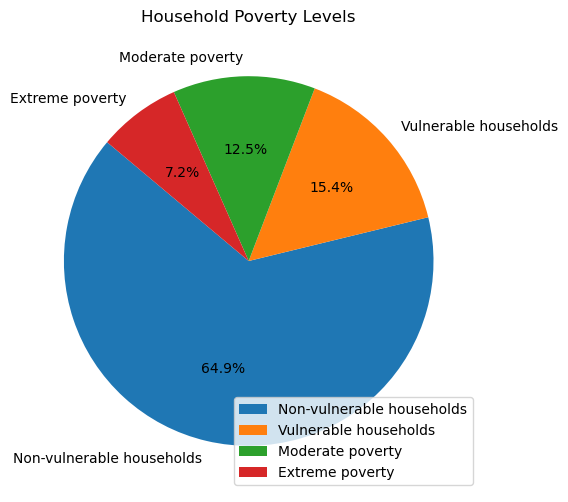

In [6]:
poverty_counts = all_data['Target'].value_counts()
labels = ['Non-vulnerable households', 'Vulnerable households', 'Moderate poverty', 'Extreme poverty']

plt.figure(figsize=(8, 6))
plt.pie(poverty_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Household Poverty Levels')
plt.legend(loc=4)
plt.show()

**Nhận xét:**
+ Phân phối mức độ nghèo: Biểu đồ có một tỷ lệ không nhỏ các hộ gia đình ở Costa Rica đang phải đối mặt với nghèo đói, với 7.2% ở mức độ nghèo cực độ và 12.5% ở mức độ nghèo vừa phải. Điều này cho thấy rằng vẫn còn một phần lớn của dân số sống trong điều kiện khó khăn và đòi hỏi sự chú ý đặc biệt từ phía chính phủ và các tổ chức xã hội.
+ Nhóm dễ tổn thương: Tỷ lệ 15.4% cho biết có một phần đáng kể các hộ gia đình ở Costa Rica thuộc nhóm dễ tổn thương, có khả năng rơi vào hoàn cảnh khó khăn nếu gặp phải các tác động không lường trước được như mất việc làm, thảm họa tự nhiên, hoặc sự biến động trong kinh tế.
+ Nhóm không dễ tổn thương: Tuy nhiên, với tỷ lệ 64.9%, phần lớn các hộ gia đình được xem là không dễ tổn thương, có khả năng ổn định hơn về mặt kinh tế và ít có nguy cơ rơi vào tình trạng nghèo đói.